# 1. Import Required Libraries (Run for all!)
Import the necessary libraries, including pandas, nibabel, nilearn, and numpy.

In [1]:
# Import Required Libraries

import pandas as pd  # For data manipulation
import nibabel as nib  # For loading fMRI data
from nilearn import plotting, image, glm  # For fMRI data analysis and visualization
import numpy as np  # For numerical operations
import os
import glob

In [6]:
# Get the hostname of the machine
hostname = os.uname().nodename

# Define the base directory based on the hostname
if hostname == 'nyx-login0.hpc.kyb.local':
    base_dir = '/home/hmueller2/Downloads/ibc_all/'
else:
    base_dir = '/Users/hannahmueller/nyx_mount/Downloads/ibc_all/'

print(f"Base directory set to: {base_dir}")

Base directory set to: /home/hmueller2/Downloads/ibc_all/


In [34]:
# Define the subject ID and task type
Subject = '01'  # CHANGE
Task = 'ArchiSocial' # CHANGE
Direction = 'ap'  # CHANGE

# 2. BIDS Structure - Overview

my data is in bids structure where each fmri file is named like this sub-XX_ses-YY_task-ZZZ_dir-AA_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz. Help me browse through all my folders in "/Users/hannahmueller/nyx_mount/Downloads/ibc_all/" to find all files i have when inputting the subject ID XX and task type ZZZ

In [8]:
# Function to find out when and how often a specific task was done by a subject.

def find_fmri_files(base_dir, Subject, Task):
    # Define the search pattern
    search_pattern = f"sub-{Subject}_ses-*_task-{Task}_dir-*_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz"
    
    # Use glob to find all matching files
    fmri_files = glob.glob(os.path.join(base_dir, '**', search_pattern), recursive=True)
    
    return fmri_files

# Find the fMRI files
fmri_files = find_fmri_files(base_dir, Subject, Task)

# Display the found files
fmri_files

['/home/hmueller2/Downloads/ibc_all/sub-01/ses-07/func/sub-01_ses-07_task-ArchiSocial_dir-ap_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
 '/home/hmueller2/Downloads/ibc_all/sub-01/ses-07/func/sub-01_ses-07_task-ArchiSocial_dir-pa_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
 '/home/hmueller2/Downloads/ibc_all/sub-01/ses-00/func/sub-01_ses-00_task-ArchiSocial_dir-pa_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
 '/home/hmueller2/Downloads/ibc_all/sub-01/ses-00/func/sub-01_ses-00_task-ArchiSocial_dir-ap_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz']

In [37]:
# Function to create task overview for chosen subject

def create_task_overview(base_dir):
    # Define the search pattern for the fMRI files
    search_pattern = f"sub-{Subject}_ses-*_task-*_dir-{Direction}_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz"
    
    # Use glob to find all matching files
    fmri_files = glob.glob(os.path.join(base_dir, '**', search_pattern), recursive=True)
    
    # Create a dataframe to store the task overview
    task_overview = pd.DataFrame(fmri_files, columns=['File'])
    
    # Extract task information from the file paths
    task_overview['Task'] = task_overview['File'].apply(lambda x: os.path.basename(x).split('_')[2].split('-')[1])
    
    # Extract session information from the file paths
    task_overview['Session'] = task_overview['File'].apply(lambda x: os.path.basename(x).split('_')[1])
    
    return task_overview

# Create the task overview dataframe
task_overview = create_task_overview(base_dir)

# Display the task overview dataframe
task_overview.sort_values(by='Task')


,File,Task,Session
11,/home/hmueller2/Downloads/ibc_all/sub-01/ses-0...,ArchiEmotional,ses-07
17,/home/hmueller2/Downloads/ibc_all/sub-01/ses-0...,ArchiSocial,ses-00
9,/home/hmueller2/Downloads/ibc_all/sub-01/ses-0...,ArchiSocial,ses-07
16,/home/hmueller2/Downloads/ibc_all/sub-01/ses-0...,ArchiSpatial,ses-00
10,/home/hmueller2/Downloads/ibc_all/sub-01/ses-0...,ArchiSpatial,ses-07
15,/home/hmueller2/Downloads/ibc_all/sub-01/ses-0...,ArchiStandard,ses-00
8,/home/hmueller2/Downloads/ibc_all/sub-01/ses-0...,ArchiStandard,ses-07
4,/home/hmueller2/Downloads/ibc_all/sub-01/ses-2...,Audi,ses-23
29,/home/hmueller2/Downloads/ibc_all/sub-01/ses-1...,ContRing,ses-11
13,/home/hmueller2/Downloads/ibc_all/sub-01/ses-1...,EmotionalPain,ses-18


In [10]:
# Extract task information from the file paths
task_overview['Task'] = task_overview['File'].apply(lambda x: os.path.basename(x).split('_')[2].split('-')[1])

# Extract session information from the file paths
task_overview['Session'] = task_overview['File'].apply(lambda x: os.path.basename(x).split('_')[1])

# Group by task and list the unique session folders for each task
task_sessions = task_overview.groupby('Task')['Session'].unique().reset_index()

# Display the task sessions overview
task_sessions

,Task,Session
0,ArchiEmotional,[ses-07]
1,ArchiSocial,"[ses-07, ses-00]"
2,ArchiSpatial,"[ses-07, ses-00]"
3,ArchiStandard,"[ses-07, ses-00]"
4,Audi,[ses-23]
5,ContRing,[ses-11]
6,EmotionalPain,[ses-18]
7,Enumeration,[ses-20]
8,HcpEmotion,[ses-03]
9,HcpGambling,[ses-03]


Do the same as for task_sessions but in a common dataset for all subjects to show for all tasks (columns) where it's shown in which folders/sessions this task appered. Sort by subject (rows) and task (columns)

# 3. Tasks Conditions/Contrast
File naming: sub-{Subject}_ses-*_task-{Task}_dir-ap_events.tsv

## 3.1 DEFINE

In [46]:
# Choose Subject, Task and Direction
Subject = '01'  # CHANGE
Task = 'ArchiStandard'  # CHANGE
Direction = 'ap'  # CHANGE
Session = '07'  # CHANGE

In [16]:
# Open the overview file for all tasks and sessions
task_overview = pd.read_csv('/home/hmueller2/ibc_code/ibc_latent/common_task_sessions.csv')
#task_overview = pd.read_csv('/Users/hannahmuller/nyx_mount/ibc_code/ibc_latent/common_task_sessions.csv')

task_overview

,Subject,ArchiEmotional,ArchiSocial,ArchiSpatial,ArchiStandard,Attention,Audi,Audio,Bang,BiologicalMotion1,...,Stroop,TheoryOfMind,TwoByTwo,VSTM,VSTMC,Visu,VisualSearch,WardAndAllport,WedgeAnti,WedgeClock
0,1,7,"07, 00","07, 00","07, 00",NaN,23.0,NaN,24.0,NaN,...,NaN,18.0,NaN,20.0,NaN,23.0,NaN,NaN,11.0,11.0
1,2,1,"00, 01","00, 01","00, 01",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,4,04,"00, 04","00, 04",24.0,19.0,"23, 22",21.0,29.0,...,25.0,16.0,24.0,17.0,36.0,19.0,38.0,26.0,9.0,9.0
3,5,4,04,"00, 04","00, 04",24.0,19.0,"23, 21",20.0,29.0,...,25.0,16.0,24.0,17.0,36.0,19.0,38.0,26.0,9.0,9.0
4,6,4,"00, 04","00, 04","00, 04",24.0,19.0,"23, 22",21.0,29.0,...,25.0,16.0,24.0,17.0,36.0,19.0,38.0,26.0,8.0,8.0
5,7,4,"00, 04","00, 04","00, 04",24.0,19.0,"21, 22",23.0,29.0,...,25.0,16.0,24.0,17.0,36.0,19.0,NaN,26.0,8.0,8.0
6,8,1,"00, 01","00, 01","00, 01",26.0,22.0,"24, 25",23.0,31.0,...,27.0,19.0,26.0,20.0,37.0,22.0,39.0,28.0,8.0,8.0


In [ ]:
# Find one possible events file for the chosen subject and task

# Extract file path for the chosen subject and task
events_file_path = glob.glob(os.path.join(base_dir, f'sub-{Subject}', '**', f'sub-{Subject}_ses-*_task-{Task}_dir-ap_events.tsv'), recursive=True)[0]

# Display the extracted file path
events_file_path

'/home/hmueller2/Downloads/ibc_all/sub-01/ses-07/func/sub-01_ses-07_task-ArchiStandard_dir-ap_events.tsv'

In [19]:
# Sanity Check. Are all .tsv files the same across sessions for a given subject and task?

def compare_tsv_files(base_dir, Subject, Task):
    # Define the search pattern for the events files
    search_pattern = f"sub-{Subject}_ses-*_task-{Task}_dir-ap_events.tsv"
    
    # Use glob to find all matching files
    tsv_files = glob.glob(os.path.join(base_dir, '**', search_pattern), recursive=True)
    
    # Load the content of each tsv file into a list of dataframes
    tsv_data = [pd.read_csv(tsv_file, sep='\t') for tsv_file in tsv_files]
    
    # Compare the dataframes to check if they are the same
    comparison_results = all(tsv_data[0].equals(df) for df in tsv_data[1:])
    
    return comparison_results, tsv_files

# Compare the .tsv files across session folders
comparison_results, tsv_files = compare_tsv_files(base_dir, Subject, Task)

# Display the comparison results
print(f"Are all .tsv files the same across sessions for subject {Subject} and task {Task}? {comparison_results}")
print("Files compared:")
for tsv_file in tsv_files:
    print(tsv_file)

Are all .tsv files the same across sessions for subject 01 and task ArchiStandard? True
Files compared:
/home/hmueller2/Downloads/ibc_all/sub-01/ses-07/func/sub-01_ses-07_task-ArchiStandard_dir-ap_events.tsv
/home/hmueller2/Downloads/ibc_all/sub-01/ses-00/func/sub-01_ses-00_task-ArchiStandard_dir-ap_events.tsv


## 3.2 Load Event Data
Load the event data from the specified .tsv file using pandas.

In [43]:
# Load the event data using pandas
events_data = pd.read_csv(events_file_path, sep='\t')

# Display the first few rows of the event data to verify it has been loaded correctly
events_data.head()

,onset,duration,trial_type
0,0.0,1,video_computation
1,2.4,1,video_computation
2,8.7,1,horizontal_checkerboard
3,11.4,1,audio_right_hand
4,15.0,1,audio_sentence


In [44]:
# Unique Conditions

# Extract different conditions of the task from the event data
conditions = events_data['trial_type'].unique()
conditions

array(['video_computation', 'horizontal_checkerboard', 'audio_right_hand',
       'audio_sentence', 'video_right_hand', 'audio_left_hand',
       'video_left_hand', 'vertical_checkerboard', 'audio_computation',
       'video_sentence'], dtype=object)

In [26]:
# Choose conditions you want to include from events_data

conditions = ['video_computation', 'audio_sentence', 'audio_computation', 'video_sentence']

## 3.3 Load fMRI Data
Load the fMRI data from the .nii file using nibabel.

In [47]:
# Load fMRI Data

# Define the path to the fMRI data file
fmri_file_path = os.path.join(base_dir, f'sub-{Subject}', f'ses-{Session}', 'func', f'sub-{Subject}_ses-*_task-{Task}_dir-{Direction}_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
fmri_file_path = glob.glob(fmri_file_path, recursive=True)[0]

# Load the fMRI data using nibabel
fmri_img = nib.load(fmri_file_path)

# Display basic information about the fMRI data
print(fmri_img)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (105, 127, 105, 156)
affine:
[[  -1.5    0.     0.    78. ]
 [   0.     1.5    0.  -112. ]
 [   0.     0.     1.5  -70. ]
 [   0.     0.     0.     1. ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  4 105 127 105 156   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.   1.5  1.5  1.5  0.   0.   0.   0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : n

# 4. GLM

## 4.1 Time series file

In [53]:
# Import time series file, depending on {Task}, {Subject}, {Session}, {Direction}

# Define the path to the time series file
time_series_file_path = os.path.join(base_dir, f'sub-{Subject}', f'ses-{Session}', 'func', f'sub-{Subject}_ses-{Session}_task-{Task}_dir-{Direction}_desc-confounds_timeseries.tsv')

# Use glob to find the time series file
time_series_file_path = glob.glob(time_series_file_path, recursive=True)[0]

# Load the time series data using pandas
time_series_data = pd.read_csv(time_series_file_path, sep='\t')

# Display the first few rows of the time series data to verify it has been loaded correctly
time_series_data.head()


,Unnamed: 0,tx,ty,tz,rx,ry,rz
0,0,0.000000,0.000000,0.000000,-5.551115e-17,1.504633e-36,8.352390e-53
1,1,0.002090,0.024848,-0.013687,-1.903597e-04,6.165573e-05,9.536149e-05
2,2,0.004921,0.010995,0.007343,-1.061317e-04,-1.094557e-05,7.107291e-05
3,3,-0.000993,0.010673,0.015817,4.962357e-05,1.291581e-04,3.189130e-05
4,4,-0.010356,0.022654,0.003024,1.309619e-04,-1.079039e-04,-1.164102e-04


     audio_computation  audio_left_hand  audio_right_hand  audio_sentence  \
0.0                0.0              0.0               0.0             0.0   
2.0                0.0              0.0               0.0             0.0   
4.0                0.0              0.0               0.0             0.0   
6.0                0.0              0.0               0.0             0.0   
8.0                0.0              0.0               0.0             0.0   

     horizontal_checkerboard  vertical_checkerboard  video_computation  \
0.0                      0.0                    0.0           0.000000   
2.0                      0.0                    0.0           0.016972   
4.0                      0.0                    0.0           0.159684   
6.0                      0.0                    0.0           0.329521   
8.0                      0.0                    0.0           0.341733   

     video_left_hand  video_right_hand  video_sentence   drift_1   drift_2  \
0.0           

/home/hmueller2/.local/lib/python3.12/site-packages/nilearn/glm/first_level/first_level.py:485: UserWarning: If design matrices are supplied, confounds and events will be ignored.
  warn(


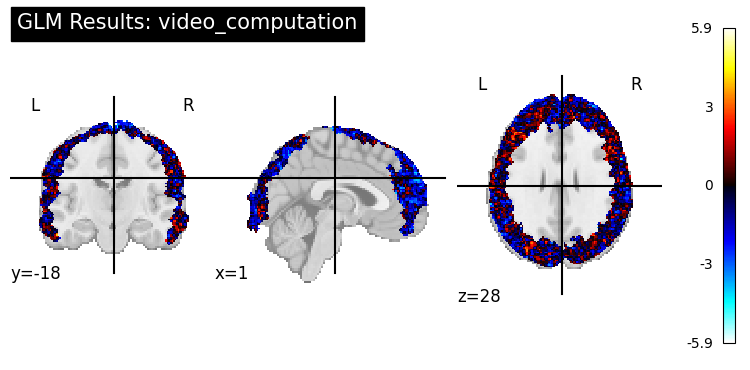

In [54]:
from nilearn.glm.first_level import make_first_level_design_matrix, FirstLevelModel

# now lets use the events file and the chosen conditions to extract which time points (combination of onset and duration) are import from the fmri_img. Afterwards I want to build a GLM with it and regress the time_series_data out (which is the head movements in all directions).

# Extract time points for the chosen conditions
frame_times = np.arange(fmri_img.shape[-1]) * 2.0  # Assuming TR=2.0 seconds

# Create a design matrix
design_matrix = make_first_level_design_matrix(
    frame_times,
    events_data[events_data['trial_type'].isin(conditions)],
    hrf_model='spm'
)

# Display the design matrix
print(design_matrix.head())

# Build and fit the GLM
glm = FirstLevelModel(t_r=2.0, noise_model='ar1', standardize=True)
glm = glm.fit(fmri_img, design_matrices=design_matrix)

# Regress out the head movements (time_series_data)
confounds = time_series_data[['tx', 'ty', 'tz', 'rx', 'ry', 'rz']]
glm = glm.fit(fmri_img, design_matrices=design_matrix, confounds=confounds)

# Display the GLM results
glm_results = glm.compute_contrast('video_computation', output_type='stat')
plotting.plot_stat_map(glm_results, title='GLM Results: video_computation')